In [4]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

In [5]:
#Read the data and save it in a dataframe
CreditData = pd.read_csv("D:/MachineLearning/RelevantProjects/Creditdefault.csv")

### Performing Exploratory Analysis and Data Wrangling

In [6]:
CreditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
#Let's rename the column Pay_0 to Pay_1 to make it continuous.
CreditData.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

#Also rename credit Default next month to Credit_Default.
CreditData.rename(columns={'default.payment.next.month':'Credit_Default'}, inplace=True)

In [5]:
#Check the data types of the columns
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   SEX             30000 non-null  int64  
 3   EDUCATION       30000 non-null  int64  
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_1           30000 non-null  int64  
 7   PAY_2           30000 non-null  int64  
 8   PAY_3           30000 non-null  int64  
 9   PAY_4           30000 non-null  int64  
 10  PAY_5           30000 non-null  int64  
 11  PAY_6           30000 non-null  int64  
 12  BILL_AMT1       30000 non-null  float64
 13  BILL_AMT2       30000 non-null  float64
 14  BILL_AMT3       30000 non-null  float64
 15  BILL_AMT4       30000 non-null  float64
 16  BILL_AMT5       30000 non-null  float64
 17  BILL_AMT6       30000 non-null 

In [6]:
#Check for the presence of nulls
CreditData.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_1             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Credit_Default    0
dtype: int64

In [7]:
CreditData['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [8]:
#Gender 1- Male, 2- Female
CreditData['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
CreditData['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
#We know that there are only education categories ranging from 1 to 4. Let us put everything else in Category 4. 
CreditData["EDUCATION"]=CreditData["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [11]:
CreditData['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
#We know that there are 3 marriage categories. Let us put category 0 also in category 3 of others.
CreditData["MARRIAGE"]=CreditData["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [13]:
CreditData['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [14]:
pay0=CreditData['PAY_1'].value_counts()
pay2=CreditData['PAY_2'].value_counts()
pay3=CreditData['PAY_3'].value_counts()
pay4=CreditData['PAY_4'].value_counts()
pay5=CreditData['PAY_5'].value_counts()
pay6=CreditData['PAY_6'].value_counts()
print(pay0,pay2,pay3,pay4,pay5,pay6)

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64  0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64  0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64  0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64  0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64  0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


In [10]:
#-1 stands for paid duly, let's put all the -2s and 0s into category -1.
CreditData["PAY_1"]=CreditData["PAY_1"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
CreditData["PAY_2"]=CreditData["PAY_2"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
CreditData["PAY_3"]=CreditData["PAY_3"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
CreditData["PAY_4"]=CreditData["PAY_4"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
CreditData["PAY_5"]=CreditData["PAY_5"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})
CreditData["PAY_6"]=CreditData["PAY_6"].map({-2:-1,-1:-1,0:-1,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8})

Text(0.5, 1.0, 'Plot of default status for next month')

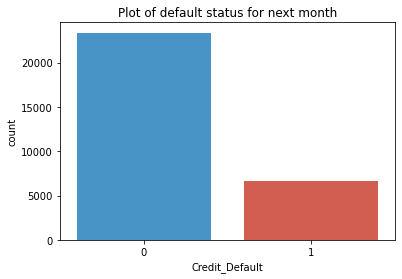

In [11]:
#prediction labels
flatui = ["#3498db","#e74c3c"]
sns.countplot(x='Credit_Default', data=CreditData, palette=flatui).set_title("Plot of default status for next month")

#### We observe that the dataset contains more number of non-credit defaulters compared to the defaulters.

Text(0.5, 1.0, 'Plot of default status for next month vs Limit Balance')

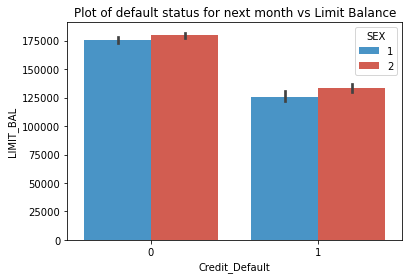

In [16]:
#default payment vs Limit_bal wrt gender
sns.barplot(x="Credit_Default",y="LIMIT_BAL", hue="SEX", data=CreditData, palette=flatui).set_title("Plot of default status for next month vs Limit Balance")

#### We observe that the people who tend to default generally have relatively lower Credit (Limit Balance). 

([<matplotlib.axis.XTick at 0x184ea137988>,
 [Text(0, 0, 'Others'),
  Text(0, 0, 'High School'),
  Text(0, 0, 'University'),
  Text(0, 0, 'Grad School')])

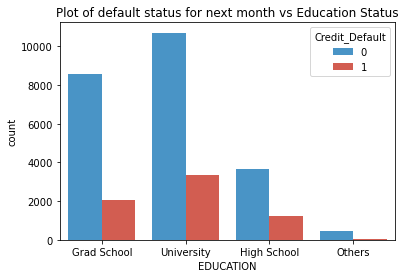

In [17]:
#Education levels count vs default payments
sns.countplot(x="EDUCATION", hue="Credit_Default", data=CreditData, palette=flatui).set_title("Plot of default status for next month vs Education Status")
labels = ['Others', 'High School', 'University', 'Grad School']
plt.xticks([3,2,1,0], labels, rotation=0)

#### It is oserved that the proportion of people who tend to default is lower in Graduate School and University graduates compared to High School graduates and others.

([<matplotlib.axis.XTick at 0x184ea93e2c8>,
 [Text(0, 0, 'Others'), Text(0, 0, 'Single'), Text(0, 0, 'Married')])

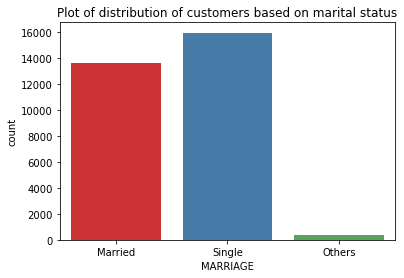

In [18]:
#Marriage levels count
sns.countplot(x="MARRIAGE", data=CreditData, palette="Set1").set_title("Plot of distribution of customers based on marital status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

([<matplotlib.axis.XTick at 0x184ea85ef48>,
 [Text(0, 0, 'Others'), Text(0, 0, 'Single'), Text(0, 0, 'Married')])

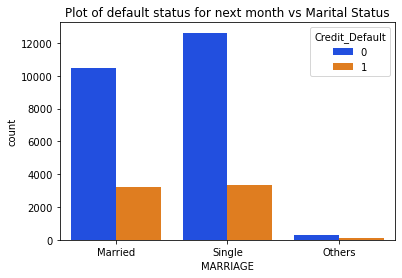

In [19]:
#Marriage levels vs defaul payments
sns.countplot(x="MARRIAGE", hue="Credit_Default", data=CreditData, palette="bright").set_title("Plot of default status for next month vs Marital Status")
labels = ['Others', 'Single', 'Married']
plt.xticks([2,1,0], labels, rotation=0)

#### It is observed that the proportion of Single people tend not to default. 

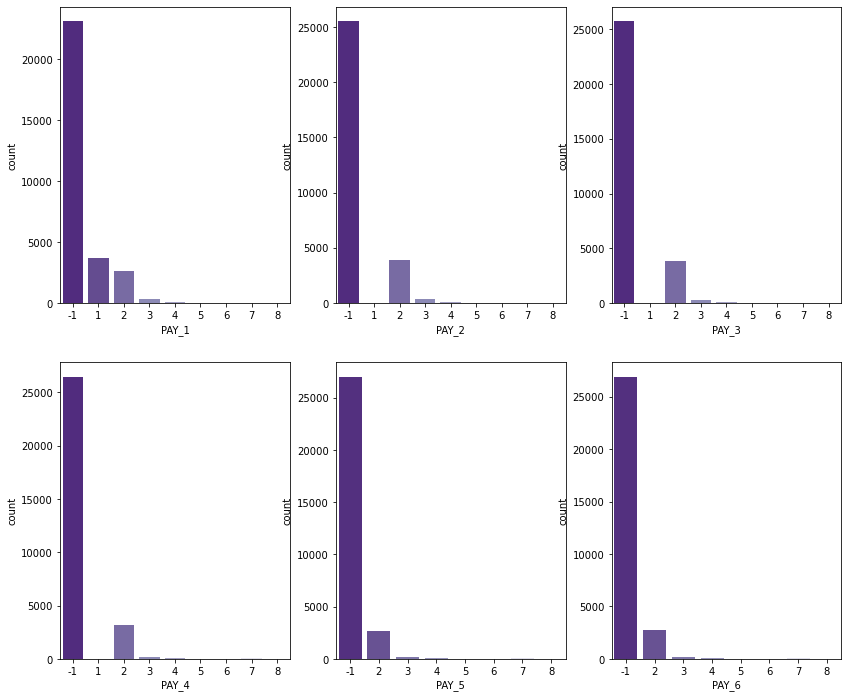

In [21]:
#All Repayment(Pay) distributions
fig = plt.figure(figsize=(14,12))
fig.add_subplot(231)
sns.countplot(x="PAY_1", data=CreditData,palette="Purples_r")
fig.add_subplot(232)
sns.countplot(x="PAY_2", data=CreditData,palette="Purples_r")
fig.add_subplot(233)
sns.countplot(x="PAY_3", data=CreditData,palette="Purples_r")
fig.add_subplot(234)
sns.countplot(x="PAY_4", data=CreditData,palette="Purples_r")
fig.add_subplot(235)
sns.countplot(x="PAY_5", data=CreditData,palette="Purples_r")
fig.add_subplot(236)
sns.countplot(x="PAY_6", data=CreditData,palette="Purples_r")

#### We can observe that the majority of the people do make the payment of the previous month duly.

Text(0.5, 1.0, 'Count Plot of Credit taken by the customers in Millions')

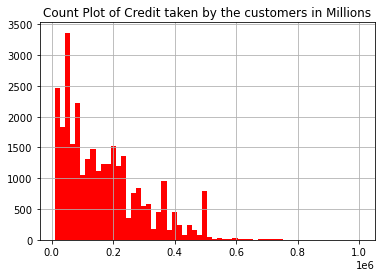

In [25]:
#Limit Bal distribution
CreditData['LIMIT_BAL'].hist(bins=60, color='red').set_title("Count Plot of Credit taken by the customers in Millions")

Text(0.5, 1.0, 'Heatmap of all the attributes')

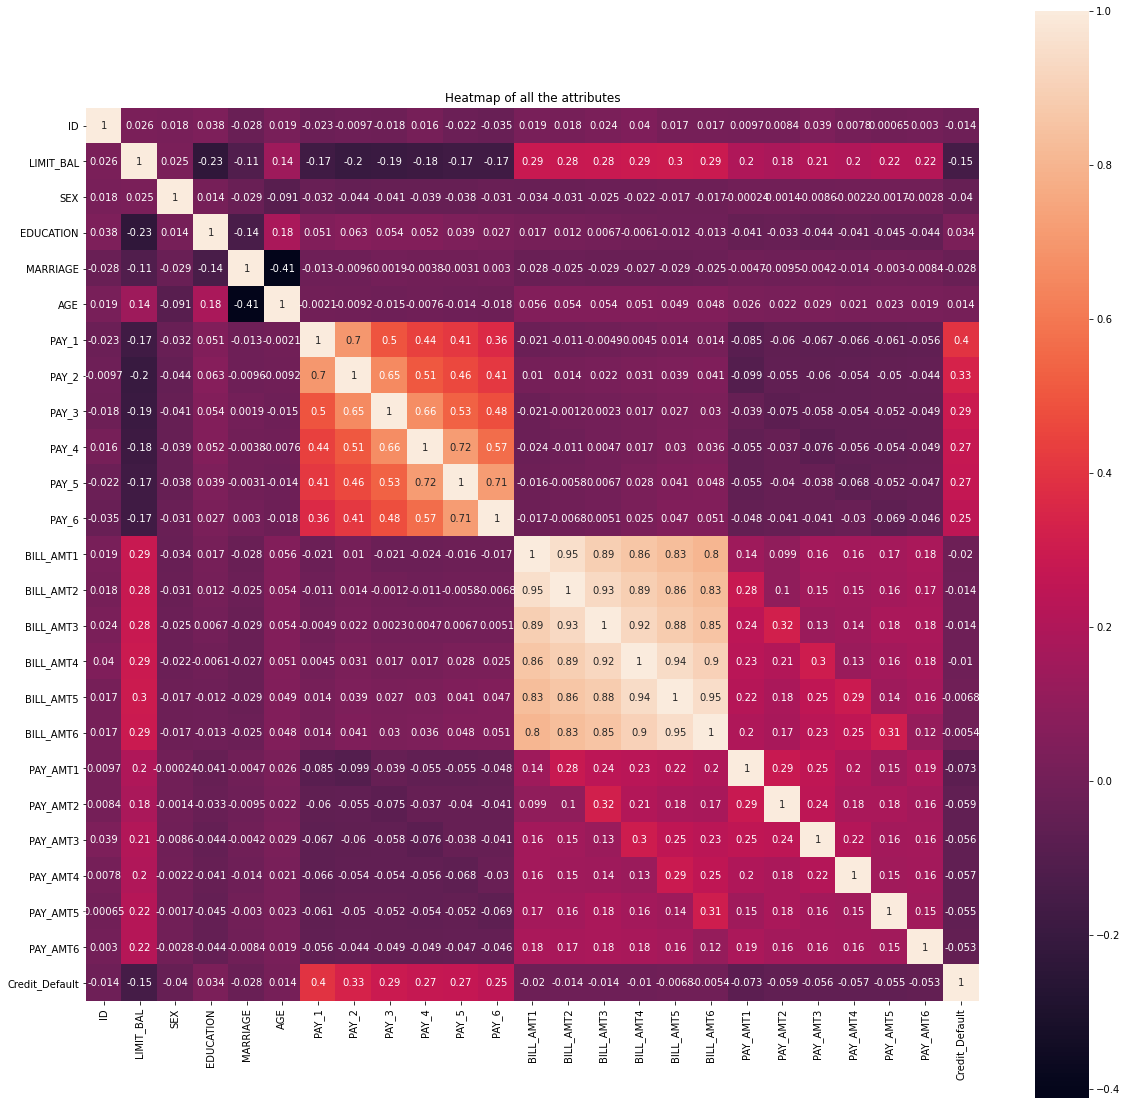

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(CreditData.corr(),annot = True,square = True).set_title("Heatmap of all the attributes")

#### From the heatmap, we observe that certain attributes like the Pay and Bill Amount are positively corelated. 

In [24]:
#Building ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Feature Engineering

In [25]:
#One hot encoding the categorical variables using pd.get_dummies. 
CreditData[['SEX','MARRIAGE','EDUCATION']] = CreditData[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
CreditData = pd.get_dummies(CreditData)
CreditData.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Credit_Default,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-1,-1,3913.0,...,1,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,-1,2,-1,-1,-1,2,2682.0,...,1,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,-1,-1,-1,-1,-1,-1,29239.0,...,0,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,-1,-1,-1,-1,-1,-1,46990.0,...,0,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,-1,-1,-1,-1,-1,-1,8617.0,...,0,1,0,0,1,0,0,1,0,0


In [26]:
#Now let's perform data normalisation 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
X = CreditData.drop(['Credit_Default','ID'], axis=1) 
scaled = scaler.fit_transform(X)

y = CreditData['Credit_Default']

#Creating Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [27]:
# create the training df by remerging X_train and y_train
CreditData_train = pd.concat([X_train, y_train], axis=1)

In [33]:
CreditData_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 11018 to 27126
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LIMIT_BAL       21000 non-null  float64
 1   AGE             21000 non-null  int64  
 2   PAY_1           21000 non-null  int64  
 3   PAY_2           21000 non-null  int64  
 4   PAY_3           21000 non-null  int64  
 5   PAY_4           21000 non-null  int64  
 6   PAY_5           21000 non-null  int64  
 7   PAY_6           21000 non-null  int64  
 8   BILL_AMT1       21000 non-null  float64
 9   BILL_AMT2       21000 non-null  float64
 10  BILL_AMT3       21000 non-null  float64
 11  BILL_AMT4       21000 non-null  float64
 12  BILL_AMT5       21000 non-null  float64
 13  BILL_AMT6       21000 non-null  float64
 14  PAY_AMT1        21000 non-null  float64
 15  PAY_AMT2        21000 non-null  float64
 16  PAY_AMT3        21000 non-null  float64
 17  PAY_AMT4        21000 non-n

In [34]:
# Separate majority and minority classes
CreditNonDefaulter = CreditData_train[CreditData_train.Credit_Default == 0]
CreditDefaulter = CreditData_train[CreditData_train.Credit_Default == 1]

print(CreditData_train.Credit_Default.value_counts())

0    16355
1     4645
Name: Credit_Default, dtype: int64


In [35]:
#To handle class imbalance, we perform Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

32710
16355


In [36]:
# Combine majority class with upsampled minority class
CreditData_normalized = pd.concat([X_train, y_train], axis=1)
# Display new class counts
CreditData_normalized.Credit_Default.value_counts()

1    16355
0    16355
Name: Credit_Default, dtype: int64

### Building the Machine Learning Models

In [45]:
#Logistic Regression

model = LogisticRegression(max_iter = 4000, random_state = 47)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.6229593396514828
Overall Test Accuracy 0.5593333333333333
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.52      0.65      7009
           1       0.29      0.71      0.42      1991

    accuracy                           0.56      9000
   macro avg       0.58      0.61      0.53      9000
weighted avg       0.74      0.56      0.60      9000



In [50]:
#Decision Tree

model1=DecisionTreeClassifier(random_state=47, criterion='entropy', max_depth=11, min_samples_leaf=19, min_samples_split=18)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model1.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.8697645979822685
Overall Test Accuracy 0.7896666666666666
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      7009
           1       0.53      0.40      0.46      1991

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.77      0.79      0.78      9000



In [51]:
#Random Forest Classifier

model2=RandomForestClassifier(random_state=47, criterion='entropy', max_depth=6, min_samples_leaf=12, min_samples_split=32)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model2.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.8264750840721492
Overall Test Accuracy 0.7986666666666666
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      7009
           1       0.55      0.49      0.52      1991

    accuracy                           0.80      9000
   macro avg       0.70      0.69      0.69      9000
weighted avg       0.79      0.80      0.79      9000



In [56]:
#AdaBoost Classifier

ada = AdaBoostClassifier()
#Creating a grid of hyperparameters
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}

#Building a 5 fold CV GridSearchCV object
model3 = GridSearchCV(ada, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)

model3.fit(X_train,y_train)
y_pred = model3.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model3.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.8742586365025986
Overall Test Accuracy 0.815
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.81      0.79      9000



In [57]:
#Gradient Boosting Classifier

gbc = GradientBoostingClassifier()

#Creating a grid of hyperparameters
param_grid = {'n_estimators': [200,300],
              'learning_rate' : [0.5, 0.75, 1.0]}

#Building a 5 fold CV GridSearchCV object
model4 = GridSearchCV(gbc, param_grid, scoring = 'accuracy', cv=5,n_jobs = -1)
    
model4.fit(X_train,y_train)
y_pred = model4.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model4.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.9032100275145215
Overall Test Accuracy 0.806
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.60      0.38      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [58]:
#Extreme Gradient Boosting Classifier

xgb = XGBClassifier()

param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
               "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
               "min_child_weight" : [1, 3, 5, 7],
               "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
               "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] }

#Building a 5 fold CV GridSearchCV object
model5 = RandomizedSearchCV(xgb, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 200,n_jobs = -1)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_train)
print('Overall Train Accuracy',accuracy_score(y_train,y_pred))
y_test_pred = model5.predict(X_test)
print('Overall Test Accuracy',accuracy_score(y_test,y_test_pred))
print('Classification Report of Test\n',  classification_report(y_test, y_test_pred))

Overall Train Accuracy 0.9979211250382146
Overall Test Accuracy 0.8058888888888889
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      7009
           1       0.60      0.38      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



### Conclusion
With an F1 score of 52% for predicting if the customer would default, the Random Forest Classifier seems to be doing the best job.